# 4.19.x Final Assignment

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 9)})
sns.set(font_scale=1.5)

### Part 1

The `food_consumption.csv` dataset from the `food` folder contains data on the several countries' food consumption per food category and their respective CO2 emissions. Load it to a DataFrame named `food` and check its contents.

In [2]:
# Carica il CSV in un DataFrame denominato food
file_path = "data/food_consumption.csv"
food = pd.read_csv(file_path)

# Controlla il contenuto del DataFrame
print(food.head())
print(food.info())
print(food.describe())

     country food_category  consumption  co2_emission
0  Argentina          pork        10.51         37.20
1  Argentina       poultry        38.66         41.53
2  Argentina          beef        55.48       1712.00
3  Argentina     lamb_goat         1.56         54.63
4  Argentina          fish         4.36          6.96
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emission   1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB
None
       consumption  co2_emission
count  1430.000000   1430.000000
mean     28.110406     74.383993
std      49.818044    152.098566
min       0.000000      0.000000
25%       2.365000      5.210000
50%       8.890000     16.530000
75%      28.13250

1. Use the `.describe()` method on the `food` DataFrame to produce descriptive statistics about the `consumption` metric for each class in the `food_category` variable. **Which `food_category` has the highest median value of `food_consumption`?**

In [3]:
# Utilizza .describe() per ottenere le statistiche descrittive per la metrica 'consumption'
description = food.groupby('food_category')['consumption'].describe()

# Trova la riga con il valore medio più alto
food_category_with_highest_median = description[description['50%'] == description['50%'].max()]

# Ottiene la 'food_category' con il valore medio più alto
highest_median_food_category = food_category_with_highest_median.index[0]

print("La categoria di cibo con il consumo medio più alto è:", highest_median_food_category)

La categoria di cibo con il consumo medio più alto è: dairy


2. In a single chart, plot one boxplot for each `food_category` (11 in total) using the variable `co2_emission` as the metric. **By looking at the chart, which `food_category` has the highest interquartile range (IQR)?**

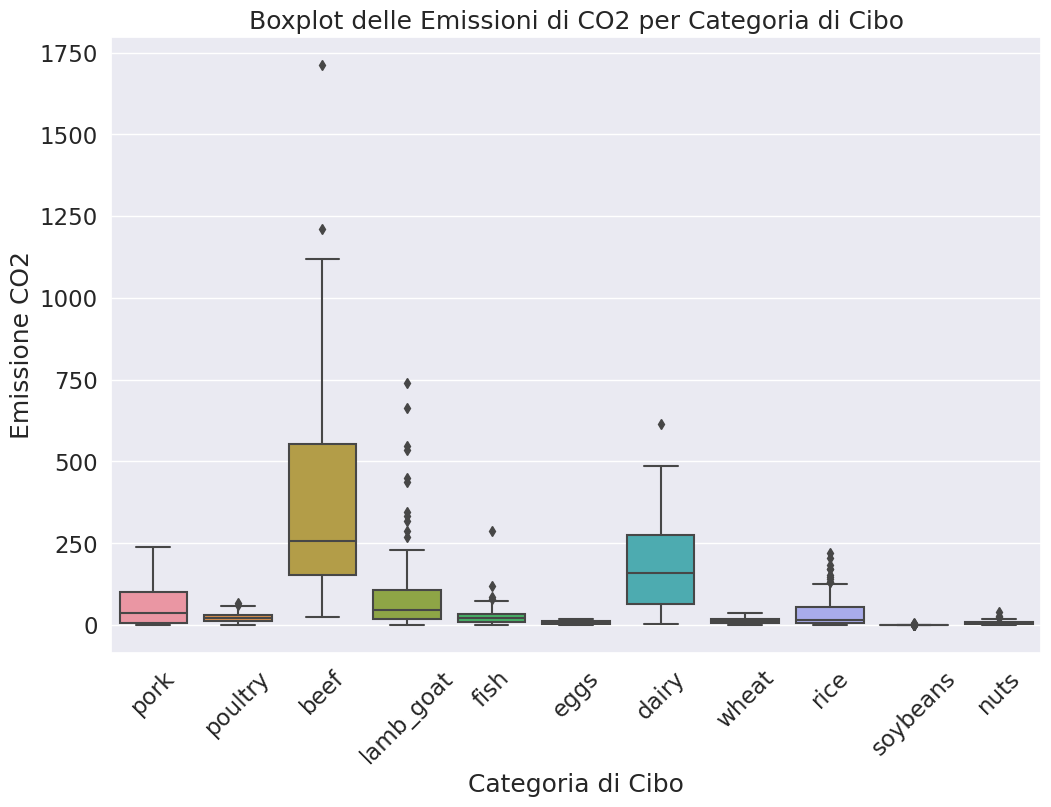

In [4]:
# Realizza un boxplot per 'food_category' usando 'co2_emission' come metrica
plt.figure(figsize=(12, 8))
sns.boxplot(x='food_category', y='co2_emission', data=food)
plt.xticks(rotation=45)
plt.xlabel('Categoria di Cibo')
plt.ylabel('Emissione CO2')
plt.title('Boxplot delle Emissioni di CO2 per Categoria di Cibo')
plt.show()

3. Looking at the chart from the previous question, which is the `food_category` with the highest median `co2_emission` value?

In [5]:
print("La 'food_category' con il valore di 'co2_emission' medio più alto è 'beef'")

La 'food_category' con il valore di 'co2_emission' medio più alto è 'beef'


4. Consider the `consumption` of "poultry" and "fish" across all available `countries`; looking at the table from question 1, the average of poultry consumption (21.22) seems to be higher than that of fish consumption (17.29), but is this difference statistically significant? Create a permutation test in order to assess the null hypothesis that there is no difference between the two means. **Do you accept or reject the null hypothesis?** Explain why.

In [6]:
# Estrae i dati di consumo per "poultry" e "fish"
consumo_poultry = food[food['food_category'] == 'poultry']['consumption']
consumo_fish = food[food['food_category'] == 'fish']['consumption']

# Calcola la differenza osservata delle medie
differenza_osservata = np.mean(consumo_poultry) - np.mean(consumo_fish)

# Combina i dati di consumo per entrambe le categorie
dati_combinati = np.concatenate([consumo_poultry, consumo_fish])

# Numero di iterazioni per il test di permutazione
num_iterazioni = 10000

# Inizializza un array vuoto per memorizzare le differenze delle medie dai campioni permutati
differenze_permutate = np.zeros(num_iterazioni)

# Esegue il test di permutazione
for i in range(num_iterazioni):
    # Mescola casualmente i dati combinati per creare una permutazione casuale
    np.random.shuffle(dati_combinati)

    # Divide i dati permutati nuovamente nei gruppi "poultry" e "fish"
    permutato_poultry = dati_combinati[:len(consumo_poultry)]
    permutato_fish = dati_combinati[len(consumo_poultry):]

    # Calcola la differenza delle medie per i campioni permutati
    differenze_permutate[i] = np.mean(permutato_poultry) - np.mean(permutato_fish)

# Calcola il valore p (proporzione delle differenze permutate >= differenza osservata)
valore_p = np.sum(differenze_permutate >= differenza_osservata) / num_iterazioni

# Determina se accettare o respingere l'ipotesi nulla in base al valore p
alfa = 0.05  # livello di significatività
if valore_p < alfa:
    risultato = "Respingeremo l'ipotesi nulla. La differenza è statisticamente significativa."
else:
    risultato = "Accetteremo l'ipotesi nulla. Non vi è una differenza statisticamente significativa."

print("Differenza osservata delle medie:", differenza_osservata)
print("Valore p:", valore_p)
print(risultato)

Differenza osservata delle medie: 3.9321538461538488
Valore p: 0.0321
Respingeremo l'ipotesi nulla. La differenza è statisticamente significativa.


### Part 2

The `world_happiness.csv` dataset from the `data` folder contains a series of variables that can be used as a proxy to a country's evaluation of its own goodness of life. The `happiness_score` metric tries to summarise how "happy" each country is. Load and save the dataset to a DataFrame object named `happy`. As always, familiarise yourself with its contents.

In [7]:
# Specifica il percorso del file CSV
file_path = "data/world_happiness.csv"

# Carica il file CSV nel DataFrame 'happy'
happy = pd.read_csv(file_path)

# Visualizza le prime righe del DataFrame
print(happy.head())

# Visualizza informazioni sul DataFrame (tipi di dati, valori non nulli, ecc.)
print(happy.info())

# Visualizza il riepilogo statistico del DataFrame
print(happy.describe())

       country  social_support  freedom  corruption  generosity  gdp_per_cap  \
0      Finland             2.0      5.0         4.0        47.0        42400   
1      Denmark             4.0      6.0         3.0        22.0        48300   
2       Norway             3.0      3.0         8.0        11.0        66300   
3      Iceland             1.0      7.0        45.0         3.0        47900   
4  Netherlands            15.0     19.0        12.0         7.0        50500   

   life_exp  happiness_score  
0      81.8              155  
1      81.0              154  
2      82.6              153  
3      83.0              152  
4      81.8              151  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          143 non-null    object 
 1   social_support   142 non-null    float64
 2   freedom          142 non-null    float64

5. Using a histogram, plot the distribution of the `happiness_score` variable, **which distribution does it resemble?** *(in the answer sheet write the [name of the distribution](https://miro.medium.com/max/962/1*DmPUIjvecL7KllOamoFSDw.png) that best fits the data)*

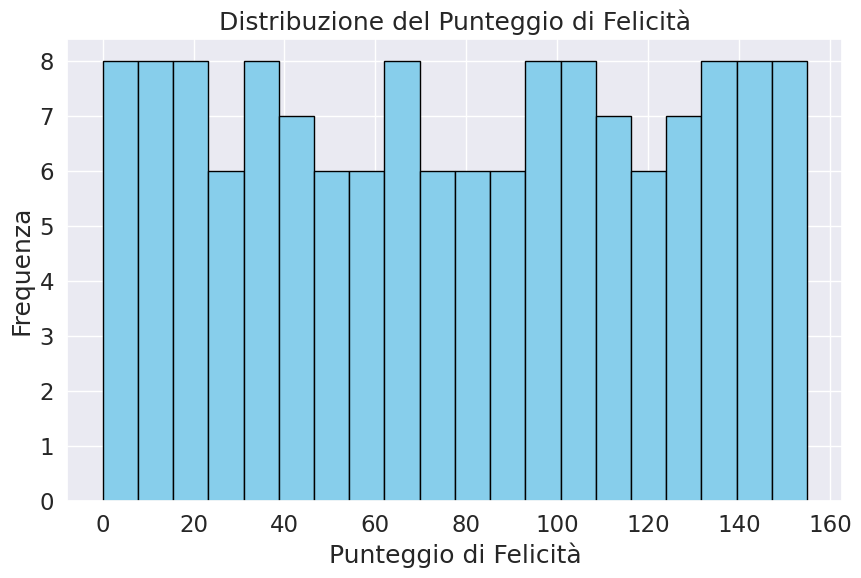

In [8]:
# Crea un istogramma per la variabile 'happiness_score'
plt.figure(figsize=(10, 6))
plt.hist(happy['happiness_score'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Punteggio di Felicità')
plt.ylabel('Frequenza')
plt.title('Distribuzione del Punteggio di Felicità')
plt.grid(True)
plt.show()

6. Plot a correlation matrix (or a correlation heatmap) between all the numeric variables in the dataset. **Which variable is the least correlated with the `happiness_score` metric?**

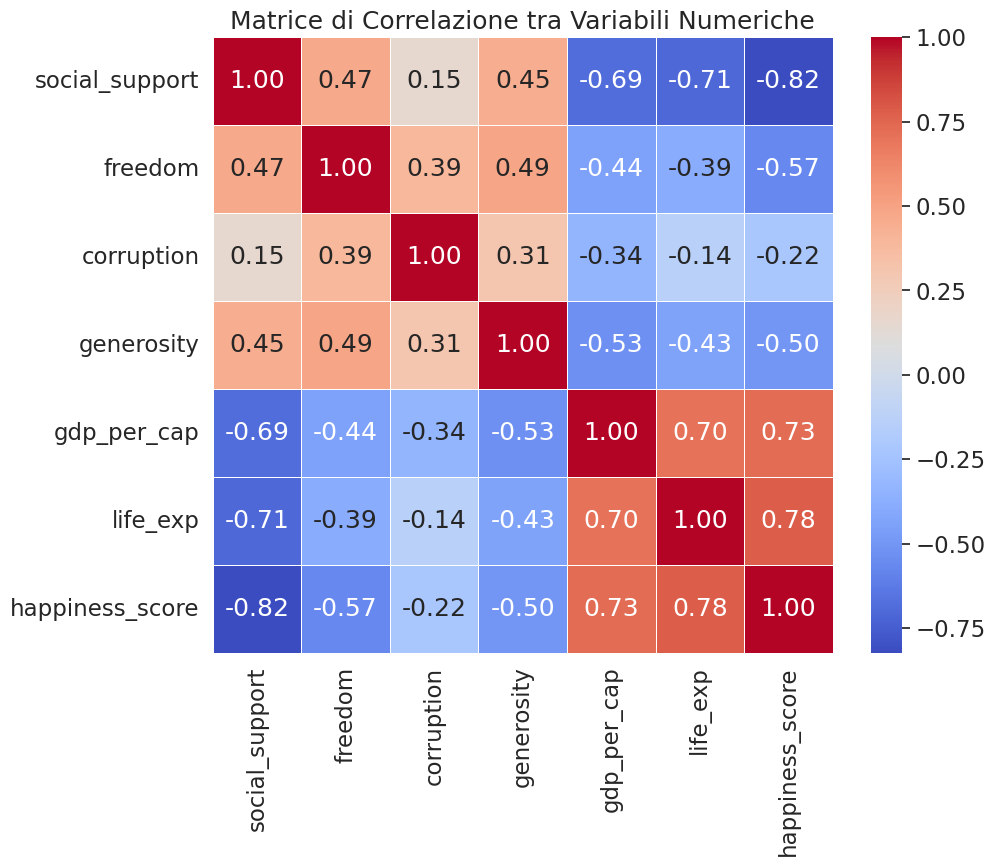

In [9]:
# Seleziona solo le colonne numeriche per la matrice di correlazione
numeric_columns = happy.select_dtypes(include=['float64', 'int64'])

# Calcola la matrice di correlazione
correlation_matrix = numeric_columns.corr()

# Traccia la heatmap di correlazione
plt.figure(figsize=(10, 8))  # Imposta le dimensioni del grafico
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice di Correlazione tra Variabili Numeriche')
plt.show()

7. You may have noticed that the `corruption` metric has some missing values. **How many countries have a missing corruption value?** After you've answered the question, replace all missing values *in all columns of the DataFrame* with the *respective column's mean value*.

In [10]:
# Conta il numero di paesi con valori mancanti per la metrica 'corruption'
num_missing_corruption = happy['corruption'].isna().sum()

print("Numero di paesi con un valore mancante per la metrica 'corruption':", num_missing_corruption)

Numero di paesi con un valore mancante per la metrica 'corruption': 8


In [11]:
# Seleziona solo le colonne numeriche (escludendo la colonna 'corruption') per calcolare la media
numeric_columns = happy.select_dtypes(include=['float64', 'int64'])
mean_values = numeric_columns.mean()

# Sostituisce i valori mancanti con la media delle rispettive colonne
happy.fillna(mean_values, inplace=True)

# Controlla nuovamente quanti paesi hanno un valore mancante per la metrica 'corruption' dopo aver effettuato la sostituzione
num_missing_corruption_after_fillna = happy['corruption'].isna().sum()

print("Numero di paesi con un valore mancante per la metrica 'corruption' dopo aver effettuato la sostituzione:", num_missing_corruption_after_fillna)


Numero di paesi con un valore mancante per la metrica 'corruption' dopo aver effettuato la sostituzione: 0


8. Use the `statsmodel` package to create a linear regression model where you use `life_exp` to predict the `happiness_score`. After [refreshing your memory on how to interpret a regression coefficient](https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/#:~:text=The%20coefficient%20value%20signifies%20how,in%20isolation%20from%20the%20others.), answer the following question: given the model you just created, **a 1-year increase in life expectancy corresponds to an increase of how many points of the happiness score variable?**.

In [13]:
import statsmodels.api as sm

X = happy['life_exp']  # Variabile predittiva
y = happy['happiness_score']  # Variabile target

# Aggiunge un termine costante alla variabile predittiva (termine di intercetta per la regressione)
X = sm.add_constant(X)

# Crea il modello di regressione lineare
model = sm.OLS(y, X).fit()

# Stampa il riepilogo del modello
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     219.4
Date:                Tue, 01 Aug 2023   Prob (F-statistic):           1.59e-30
Time:                        18:33:49   Log-Likelihood:                -683.97
No. Observations:                 143   AIC:                             1372.
Df Residuals:                     141   BIC:                             1378.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -298.8710     25.536    -11.704      0.0

9. Split the dataset in `train` and `test` sets, leaving 33% of the data in the latter. Then, using the `sklearn` package, train a linear regression model where you try to predict the `happiness_score` using the following set of predictors: `['social_support', 'freedom', 'generosity', 'life_exp']` *(use a `random_state=42`)*. Calculate the R-squared on the train set and compare it with the R-squared based on the test set. **Would you say that the model is overfitting the training data?** Motivate your answer.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Definisce le variabili predittive e la variabile target
X = happy[['social_support', 'freedom', 'generosity', 'life_exp']]  # Variabili predittive
y = happy['happiness_score']  # Variabile target

# Suddivide il dataset in set di addestramento (67%) e di test (33%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Crea e addestra il modello di regressione lineare
model = LinearRegression()
model.fit(X_train, y_train)

# Prevede i valori sul set di addestramento e di test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcola il coefficiente di determinazione R-squared sul set di addestramento e di test
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("R-squared sul set di addestramento:", r2_train)
print("R-squared sul set di test:", r2_test)


R-squared sul set di addestramento: 0.7848873839014491
R-squared sul set di test: 0.7772372395041662


10. Using the same model from the previous question, **calculate the MAE on the testing set and report it on the answers Sheet.** Are you satisfyied with the model's performance?

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Definisce le variabili predittrici e la variabile target
X = happy[['social_support', 'freedom', 'generosity', 'life_exp']]
y = happy['happiness_score']

# Divide il set di dati in treno (67%) e set di test (33%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Crea e allena il modello di regressione lineare
model = LinearRegression()
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

# Calcola l'errore assoluto medio (MAE) sul set di test
mae_test = mean_absolute_error(y_test, y_test_pred)

print("Mean Absolute Error (MAE) on the testing set:", mae_test)


Mean Absolute Error (MAE) on the testing set: 17.540466857385713


### Bonus

11. <span style="color:red">[BONUS]</span> **Do you notice anything strange when looking at the regression coefficients of the model in the previous answer?** (answer here, not on the response Google Sheet)

I notice that the happiness score decreases with life expectancy. The negative intercept may be due to an omitted variable bias, which occurs when a model created wrongly excludes one or more relevant variables. The effects of these omitted variables may be incorrectly included in the constant term, leading to its unexpected sign.

12. <span style="color:red">[BONUS]</span> The code in the following cell creates a forecasting model using the `prophet` library. Specifically, it fits an additive model (the effect of the seasonality is added to the trend in order to get forecasts) on a dataframe `df` which contains the number of airline passengers over time. Notice how the seasonality in the forecast is too large at the start of the time series and too small at the end (compared to the data it tries to fit). **Modify the Prophet code to account for the effect of growing seasonality.**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl5l8gop/uh3v70_g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl5l8gop/da9mk1ny.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53924', 'data', 'file=/tmp/tmpsl5l8gop/uh3v70_g.json', 'init=/tmp/tmpsl5l8gop/da9mk1ny.json', 'output', 'file=/tmp/tmpsl5l8gop/prophet_modeluuaxa8t6/prophet_model-20230801183416.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


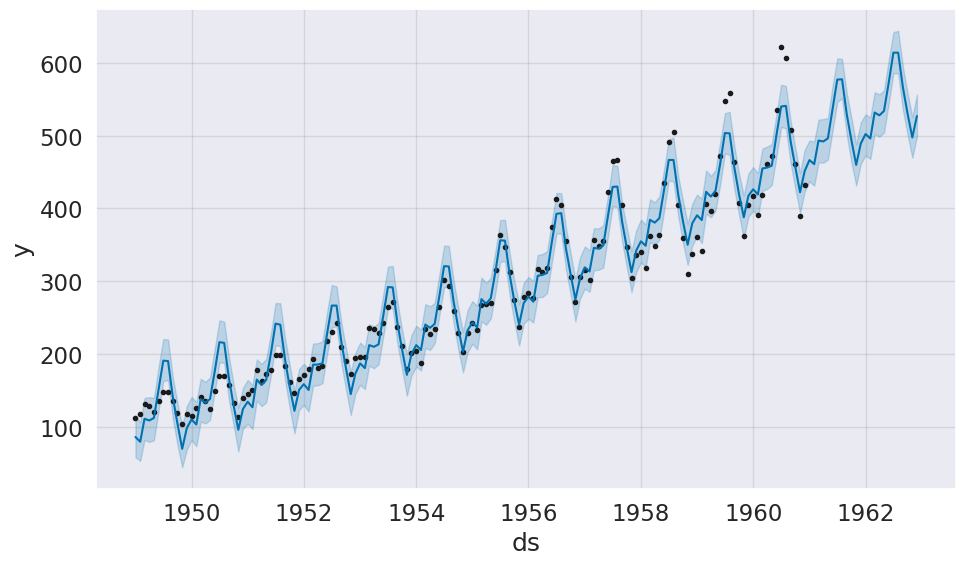

In [16]:
# DO NOT DELETE >>> RUN THIS CELL!

from prophet import Prophet

df = pd.read_csv('data/air-passengers.csv')
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(24, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl5l8gop/7_rufv3m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl5l8gop/j1harz8i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75939', 'data', 'file=/tmp/tmpsl5l8gop/7_rufv3m.json', 'init=/tmp/tmpsl5l8gop/j1harz8i.json', 'output', 'file=/tmp/tmpsl5l8gop/prophet_modelwe9pot34/prophet_model-20230801185515.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:55:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:55:15 - cmdstanpy - INFO - Chain [1] do

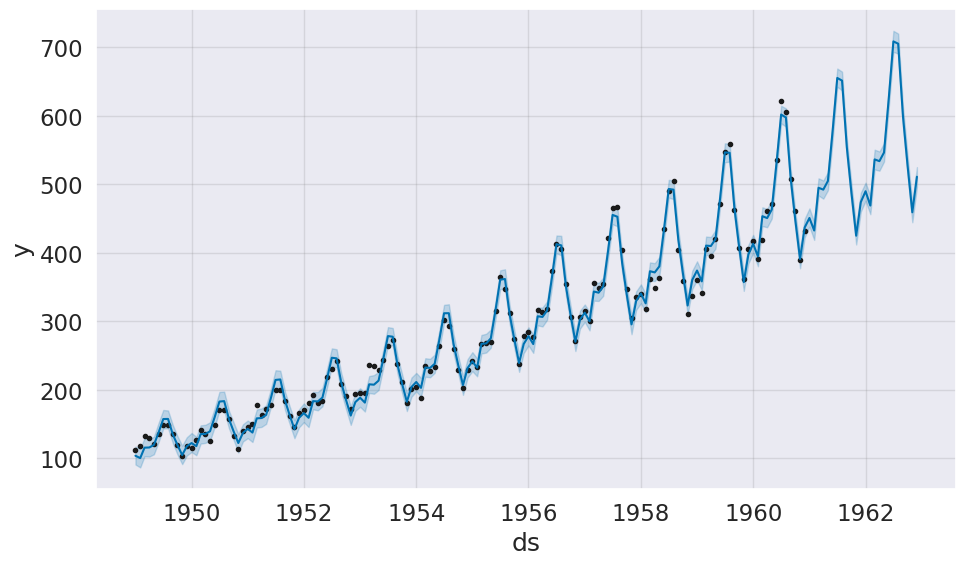

In [17]:
from prophet import Prophet

df = pd.read_csv('data/air-passengers.csv')

# Specifica 'multiplicative' come modalità di stagionalità nel modello Prophet

# Aggiunge stagionalità personalizzata con modalità 'multiplicative'
# Sceglie il periodo in base alla frequenza di stagionalità dei dati, in questo caso 365.25
m.add_seasonality(name='yearly', period=365.25, fourier_order=5, mode='multiplicative')

m.fit(df)

future = m.make_future_dataframe(24, freq='MS')

forecast = m.predict(future)
fig = m.plot(forecast)
